# Operaciones con Matrices y Dataframes

En R se tiene soporte a una estructura de dato sumamente útil para el análisis y organización de observaciones con múltiples variables: El dataframe. Para comprender mejor los dataframes y las operaciones sobre ellos, se repasará y practicará a continuación con operaciones de matrices, las cuales pueden servir para generar dataframes.

## Operaciones con Matrices

### Sumas y productos
Considere el siguiente producto simple de números:

In [1]:
2 * 2

[1] 4

Contrastando ahorita con el operador de producto matricial, `%*%`

In [2]:
2%*%2

4


El resultado será el mismo, pero el tipo de dato retornado será automáticamente una matriz, sin importar que los operandos del producto no lo sean. Probemos multiplicar las siguientes dos matrices:

In [3]:
A <- cbind(c(1,2), c(2,3))
B <- cbind(c(5,1), c(3,2))
A
B

1,2
2,3


5,3
1,2


In [4]:
A%*%B

7,7
13,12


### Álgebra lineal básica
R igualmente tiene implementadas funciones para álgebra lineal general, es decir, podemos realizar cálculos como encontrar el espectro de nuestras matrices:

In [5]:
eig <- eigen(A)

En el siguiente bloque se visualiza lo calculado:
* Los valores propios en orden descendiente
* Los vectores propios enlistados como columnas de una matriz. Éstos están en el mismo orden que los valores propios para corresponder adecuadamente.

In [6]:
eig$values
eig$vectors

[1]  4.236068 -0.236068

0.5257311,-0.8506508
0.8506508,0.5257311


Aquí se ha utilizado el operador `$` para acceder a objetos internos del objeto `eig`. En particular, este operador es a veces conocido como **operador de nombre**, ya que permite hacer referencia a los *nombres* internos de una variable. Para entender con mayor claridad esto, consideremos la funci[on `names()` para enlistar los nombres de la variable `eig`:

In [7]:
names(eig)

[1] "values"  "vectors"

Estos son precisamente los nombres a los que hemos accesido anteriormente. Ahora, aprovechamos que tenemos los vectores propios en el interior de la variable `eig` para introducir la función `crossprod()` la cual calcula el **producto interno usual**, por pares, de una lista de vectores. 

In [8]:
crossprod(eig$vectors)

1,0
0,1


Se ve que los elementos en la diagonal toman el valor de 1 (y corresponden a realizar el producto punto de cada valor propio consigo mismo, obteniendo su norma al cuadrado que sabemos que es 1) y los elementos fuera de la diagonal corresponden a números muy pequeños que bien podrían ser considerados 0. 

Esto es sólo una verificación de las propiedades de los vectores propios regresados por la función `eigen()`, son unitarios y ortogonales. 

A veces es útil poder deshacernos de cantidades tan pequeñas, que prácticamente son cero, y lo podemos lograr de la siguiente manera:

In [9]:
zapsmall(crossprod(eig$vectors))

1,0
0,1


Por supuesto, también podemos calcular determinantes:

In [10]:
det(A)

[1] -1

### Resolución de sistemas de ecuaciones
En R también es muy fácil calcular inversas de matriz:

In [11]:
A_inversa <- solve(A)
A_inversa

-3,2
2,-1


Verificamos:

In [12]:
A_inversa%*%A
A%*%A_inversa

1,0
0,1


1,0
0,1


Recordemos que todas estas operaciones son realizadas por R llamando códigos optimizados de librerías de álgebra lineal en C o en Fortran. Por ello, es importante conocer (y utilizar) las funciones ya asignadas para cada labor.

Consideremos ahora la siguiente matriz aleatoria:

In [13]:
n <- 2000
MatNorm <- matrix(rnorm(n*n, mean = 10, sd = 4), nrow = n, ncol = n)

In [14]:
MatNorm

7.687873,12.1920982,5.512654,11.4344003,19.8264002,4.446502,9.260482,13.3121085,10.744280,11.8922811,⋯,14.927303,7.761441,7.239293,8.167824,13.151298,6.194997,12.0497028,11.5687859,7.194965,8.9340252
18.503566,11.6861994,11.676320,6.2781474,5.2894329,12.125431,11.261661,15.6375725,11.136238,11.3329627,⋯,9.090321,13.628204,11.130596,10.586455,10.701363,6.145600,9.7539135,12.2907290,10.403223,6.8093390
9.455332,13.5412954,15.351449,8.0608798,1.8741197,12.248893,17.489003,13.6780604,7.229572,12.2757147,⋯,6.545973,11.495756,6.034343,7.812939,12.030099,11.563523,9.4935359,18.3543050,14.937409,8.1620593
7.851702,20.2180036,13.098582,6.2557430,10.7111070,14.433079,6.648086,12.0563282,6.044242,9.2237024,⋯,9.817449,8.181637,5.917555,10.147069,9.668293,9.672510,3.7191108,10.5344491,16.477503,19.1268611
11.759881,9.3707937,13.712998,7.5964085,9.4717311,12.153248,5.348172,3.1322507,9.036996,8.0580927,⋯,10.544913,13.170033,14.199582,9.738530,5.700553,6.691812,4.0398145,8.9878782,14.014813,10.4472829
10.174179,14.3328771,7.011041,16.1796237,12.0869096,12.927144,15.190659,15.7822423,11.172354,12.2445247,⋯,12.995545,5.998408,6.282599,4.789194,9.347627,20.326230,5.3759599,16.6788804,7.742613,15.6953263
17.393629,3.8487542,10.236791,8.5355761,11.1672835,9.772290,11.630889,8.5597171,10.756870,9.4591236,⋯,10.365670,9.397100,4.798493,8.909583,8.748524,-3.012737,10.4658034,12.8266460,8.549616,14.1547507
8.138950,0.1188237,9.210748,10.0826688,17.5120276,7.765741,13.476205,10.6745399,11.157751,4.5700871,⋯,11.267914,4.654623,14.613204,8.554618,11.196942,13.709020,9.2242252,11.8940849,13.053163,11.9200417
8.156875,15.0465092,8.464266,14.4097484,11.5619236,5.643583,9.081497,15.2931719,15.063551,7.8525078,⋯,18.535945,11.952810,8.798268,7.524930,10.732712,-3.467104,17.0520450,14.4736540,4.169313,13.5920117
8.774483,2.4726283,12.740655,8.6684194,0.8374797,4.246995,9.607416,11.9328053,16.464865,12.3308810,⋯,6.556751,14.026541,2.120194,16.946849,10.573797,10.671311,15.9213626,3.8403288,10.685400,10.0787734
10.328666,9.4419217,11.823478,8.1127637,14.4104994,10.717365,5.799274,8.9198155,10.016382,18.3674137,⋯,11.021343,8.028079,12.813544,11.408069,5.217266,9.929637,12.2531251,6.6811524,2.448014,8.7659482


¿Qué resulta de la siguiente operación?

In [15]:
# Vector de 1's
matrix(1, n)

1
1
1
1
1
1
1
1
1
1
1


In [16]:
# Media por columnas
t(matrix(1, n))%*%MatNorm/n

9.987768,9.933889,10.16351,10.20862,10.02952,10.03597,10.0966,9.942281,10.128,9.968392,⋯,10.05477,10.12126,9.993601,9.979465,9.945099,9.918196,9.995945,9.908851,10.2111,10.05083


Se pueden extraer más propiedades de cualquier matriz aleatoria de esa manera. Por otro lado, esa misma operación se puede calcular mediante:

In [17]:
colMeans(MatNorm)

[1]  9.987768  9.933889 10.163508 10.208619 10.029516 10.035973 10.096599
   [8]  9.942281 10.127997  9.968392  9.958402 10.021536  9.914943 10.075256
  [15]  9.772354 10.082951  9.878726  9.997537 10.052930 10.021274 10.063151
  [22]  9.783294  9.812430  9.681643  9.984814 10.118866  9.931943  9.952728
  [29]  9.946419  9.979452 10.097203  9.963160 10.067597  9.997636  9.770493
  [36]  9.990909  9.972897 10.083786 10.068721  9.940138  9.976245  9.834115
  [43] 10.099568  9.953374  9.970701  9.936393 10.110019 10.022121  9.960875
  [50] 10.010643  9.911555  9.968290 10.006224 10.044387  9.967105 10.068070
  [57] 10.162468  9.824850 10.075551 10.138729  9.939562 10.103673  9.981950
  [64] 10.081384 10.015012 10.142407  9.961096 10.158884  9.898783  9.858601
  [71] 10.092235 10.092813 10.011219 10.011352 10.007314  9.961930 10.078802
  [78] 10.106018 10.112267  9.889447 10.050421 10.074121 10.020590 10.056420
  [85] 10.012696  9.943795 10.006609 10.018238 10.087041  9.980810 10.029020
  [92]  9.994939 10.078923 10.107371 10.004590  9.968388  9.954403 10.045677
  [99] 10.051826  9.963788  9.977217 10.047779 10.020562  9.929482 10.003294
 [106] 10.045387 10.029078 10.029310  9.762697  9.945613 10.024612  9.970587
 [113] 10.004531 10.139612  9.926442  9.938646  9.854190 10.014555  9.982749
 [120] 10.036121  9.960163 10.063717 10.048166  9.958025  9.931656  9.930641
 [127]  9.876075  9.934003 10.051273  9.974106 10.097605 10.066783 10.064465
 [134]  9.984872  9.824813 10.041723  9.956934  9.963736  9.893697  9.957381
 [141]  9.933520  9.951383  9.974085 10.030290  9.942269 10.058386 10.127539
 [148]  9.904055  9.966162  9.995255  9.999038  9.944324  9.906699 10.047948
 [155]  9.889819 10.004001  9.948161  9.936818  9.971531 10.066200 10.212721
 [162]  9.995528  9.801857  9.978557  9.904268  9.977304 10.136751 10.040524
 [169]  9.965368  9.949225 10.045934  9.912929  9.991913 10.077238  9.928269
 [176] 10.126180  9.821760 10.024551  9.647213  9.967496 10.016202  9.924397
 [183] 10.105240  9.960285  9.856380 10.105963 10.069891 10.036377 10.082603
 [190]  9.941354  9.998917  9.837454  9.974460  9.879981 10.000852 10.030543
 [197]  9.836068 10.035617  9.995739  9.824707  9.952071 10.027445 10.043526
 [204]  9.953010 10.081079 10.046288  9.835031  9.933083  9.947637 10.069587
 [211] 10.088785 10.183702 10.095420  9.942679  9.960091  9.928519 10.075086
 [218] 10.030745  9.908975 10.009885 10.035320 10.011173  9.931205  9.925428
 [225] 10.053392  9.871333 10.037182 10.114289  9.816072  9.962922  9.958498
 [232] 10.079965  9.748014  9.896488 10.013833  9.940699  9.943317  9.967790
 [239] 10.055716 10.024340  9.863267 10.126053 10.143524 10.075375  9.919310
 [246]  9.823170 10.199750 10.139511  9.913068  9.772903 10.044276 10.060113
 [253]  9.894065  9.908314  9.960966  9.826324  9.915443  9.977136  9.818431
 [260]  9.912247  9.894717 10.214620 10.045146 10.061201 10.032861  9.953277
 [267]  9.909263  9.932489 10.113174  9.999694  9.943830  9.809851 10.004926
 [274] 10.002303  9.923517 10.039983 10.107428  9.910281  9.932974 10.047438
 [281]  9.914704  9.934112 10.090475  9.833953  9.859448 10.001382 10.065563
 [288]  9.869657 10.057218 10.077601  9.864601 10.028687 10.047980 10.062058
 [295]  9.849826  9.872862 10.011888 10.042177 10.048625  9.999564  9.921003
 [302] 10.095389  9.983031  9.920752  9.948877  9.955594 10.018296  9.941843
 [309] 10.020002  9.979307 10.150555 10.186218  9.999241 10.042967  9.910698
 [316]  9.956743 10.080921  9.876689  9.925747  9.972302 10.068354  9.939596
 [323]  9.995452  9.920082 10.069486 10.155329  9.984575 10.050390 10.003636
 [330]  9.983653 10.111314 10.032371 10.058662 10.121810  9.917001 10.035541
 [337] 10.076421 10.112028  9.774310 10.011995  9.911674 10.070649 10.008025
 [344] 10.033782  9.957716 10.075437  9.990289 10.017066 10.157082 10.071006
 [351]  9.908039  9.984596 10.089217  9.925271  9.900094 10.072443  9.975155
 [358]  9.989732 10.048097 10.030161 10.080901  9.978498 10.029105 10.068451

Ahora ¿El siguiente código qué hace?

In [18]:
# Matriz de covarianzas
x <- MatNorm - rep(1,n)%*%t(rep(1,n))%*%MatNorm/n
t(x)%*%x/n

15.058147429,-0.19441977,-0.14921329,0.03017660,-0.12880093,-0.38219903,0.0974215917,0.1398167761,-0.024060211,0.383594034,⋯,0.24909428,0.287572890,-0.053235941,0.17399056,-0.077070946,-0.427411304,-0.27042901,-0.084612603,0.17085207,0.066534229
-0.194419770,16.98507417,0.37996008,0.03787600,0.09366181,-0.36155259,-0.5492144031,0.8535008067,0.048054024,-0.212514774,⋯,-0.02791214,-0.003794508,0.195972308,-0.03849824,-0.262612378,0.339425000,0.40566529,-0.629277349,0.46877690,0.082677408
-0.149213292,0.37996008,16.52929894,0.39513225,-0.31784974,-0.97790999,-0.2117230908,-0.4423887034,0.374776515,-0.515362781,⋯,-0.28762367,-0.325746834,-0.097348413,0.42362503,-0.373032911,0.001921996,-0.37401332,-0.157423935,0.24481647,0.106138231
0.030176602,0.03787600,0.39513225,15.97734708,-0.22716308,-0.02774020,0.2948642033,-0.4749116531,0.097967244,-0.044461448,⋯,0.04220801,-0.134898595,-0.526977404,-0.67382067,-0.799325739,-0.303829066,-0.01559198,-0.271857518,-0.56288868,-0.113333569
-0.128800929,0.09366181,-0.31784974,-0.22716308,16.66207029,-0.10718199,0.2310858367,-0.3051778140,-0.083711125,0.957998953,⋯,0.40929122,-0.689559664,0.302767803,-0.15570648,0.146417674,-0.144334870,-0.29558117,0.498483493,-0.32304933,-0.123965120
-0.382199027,-0.36155259,-0.97790999,-0.02774020,-0.10718199,16.77149845,-0.0813662082,-0.1258142860,0.598992196,0.507581558,⋯,-0.23609469,-0.265308896,-0.064913029,-0.39426690,0.145993825,0.517774962,0.07746992,-0.313136183,-0.56428551,-0.079146720
0.097421592,-0.54921440,-0.21172309,0.29486420,0.23108584,-0.08136621,16.2866328807,-0.0003871587,0.200346612,0.107796105,⋯,0.02784169,-0.182541201,-0.051383419,-0.44136225,-0.255042414,-0.214311239,0.72459259,-0.301540234,0.25685758,0.705431484
0.139816776,0.85350081,-0.44238870,-0.47491165,-0.30517781,-0.12581429,-0.0003871587,16.3041604652,0.462593923,0.026392520,⋯,-0.10549140,0.263626839,0.562426558,-0.20970457,0.097338644,0.044325829,0.15061561,-0.578840314,0.16680204,-0.544979881
-0.024060211,0.04805402,0.37477651,0.09796724,-0.08371113,0.59899220,0.2003466116,0.4625939233,16.502102206,0.046198428,⋯,-0.23260398,0.452809114,-0.488679864,-0.38020591,-0.226386010,0.319083445,-0.02648825,0.794252105,0.05462260,0.330022934
0.383594034,-0.21251477,-0.51536278,-0.04446145,0.95799895,0.50758156,0.1077961051,0.0263925199,0.046198428,15.726174665,⋯,1.00041955,0.400873154,0.315452874,0.21738179,0.238848205,0.206973505,-0.03459260,-0.512505048,-0.66165864,0.522168946
-0.538602101,0.55226850,0.13330407,-0.11326559,-0.45825672,-0.05561191,-0.4331994800,0.3278879421,0.032175123,-0.308264620,⋯,0.08292421,0.640649942,0.337649752,0.57644800,0.351256610,0.081606779,0.24090556,-0.512409414,0.60723550,0.097414366


Por supuesto, el mismo cálculo puede ser realizado por funciones ya establecidas en R

In [19]:
cov(MatNorm)

15.065680269,-0.19451703,-0.14928794,0.03019170,-0.12886536,-0.38239022,0.0974703269,0.1398867195,-0.024072247,0.383785927,⋯,0.24921889,0.287716749,-0.053262572,0.17407759,-0.077109501,-0.427625116,-0.27056429,-0.084654930,0.17093754,0.066567513
-0.194517029,16.99357095,0.38015016,0.03789495,0.09370867,-0.36173345,-0.5494891477,0.8539277706,0.048078063,-0.212621085,⋯,-0.02792610,-0.003796406,0.196070343,-0.03851750,-0.262743750,0.339594797,0.40586822,-0.629592145,0.46901141,0.082718768
-0.149287936,0.38015016,16.53756772,0.39532992,-0.31800875,-0.97839919,-0.2118290053,-0.4426100084,0.374963997,-0.515620591,⋯,-0.28776755,-0.325909789,-0.097397111,0.42383695,-0.373219521,0.001922958,-0.37420042,-0.157502687,0.24493894,0.106191326
0.030191698,0.03789495,0.39532992,15.98533975,-0.22727672,-0.02775407,0.2950117092,-0.4751492278,0.098016252,-0.044483690,⋯,0.04222912,-0.134966078,-0.527241025,-0.67415775,-0.799725601,-0.303981056,-0.01559978,-0.271993514,-0.56317026,-0.113390264
-0.128865361,0.09370867,-0.31800875,-0.22727672,16.67040549,-0.10723561,0.2312014374,-0.3053304793,-0.083753002,0.958478192,⋯,0.40949597,-0.689904616,0.302919262,-0.15578437,0.146490919,-0.144407074,-0.29572903,0.498732860,-0.32321093,-0.124027134
-0.382390222,-0.36173345,-0.97839919,-0.02775407,-0.10723561,16.77988840,-0.0814069116,-0.1258772246,0.599291842,0.507835476,⋯,-0.23621280,-0.265441617,-0.064945502,-0.39446414,0.146066858,0.518033979,0.07750867,-0.313292829,-0.56456780,-0.079186313
0.097470327,-0.54948915,-0.21182901,0.29501171,0.23120144,-0.08140691,16.2947802708,-0.0003873523,0.200446835,0.107850030,⋯,0.02785562,-0.182632517,-0.051409124,-0.44158305,-0.255169999,-0.214418448,0.72495507,-0.301691080,0.25698607,0.705784377
0.139886719,0.85392777,-0.44261001,-0.47514923,-0.30533048,-0.12587722,-0.0003873523,16.3123166235,0.462825336,0.026405723,⋯,-0.10554417,0.263758718,0.562707912,-0.20980948,0.097387337,0.044348003,0.15069096,-0.579129879,0.16688548,-0.545252507
-0.024072247,0.04807806,0.37496400,0.09801625,-0.08375300,0.59929184,0.2004468350,0.4628253360,16.510357384,0.046221539,⋯,-0.23272034,0.453035632,-0.488924326,-0.38039611,-0.226499259,0.319243067,-0.02650150,0.794649430,0.05464992,0.330188028
0.383785927,-0.21262108,-0.51562059,-0.04448369,0.95847819,0.50783548,0.1078500301,0.0264057228,0.046221539,15.734041685,⋯,1.00092001,0.401073691,0.315610680,0.21749053,0.238967689,0.207077044,-0.03460990,-0.512761429,-0.66198963,0.522430161
-0.538871537,0.55254477,0.13337076,-0.11332225,-0.45848597,-0.05563973,-0.4334161880,0.3280519681,0.032191219,-0.308418829,⋯,0.08296569,0.640970427,0.337818661,0.57673637,0.351432326,0.081647602,0.24102607,-0.512665747,0.60753927,0.097463098


Otras funciones auxiliares muy útiles son `sum()` y `diag()` que respectivamente calculan la suma de las entradas de un vector, y devuelve un vector con la diagonal de la matriz de su argumento:

In [20]:
sum(diag(t(x)%*%x/n))/n

[1] 15.9895

El comando `diag()` también puede ser utilizado para generar matrices diagonales. Esto ocurre cuando su argumento no es una matriz, si no un número:

In [21]:
diag(1, 4)

1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


## Operaciones con dataframes

### Análisis exploratorio
Considere el siguiente dataframe cargable por defecto en R

In [22]:
women # Dataframe que viene por defecto en R

height,weight
<dbl>,<dbl>
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139


No es común el desplegar completamente un dataframe, si no que para tener una idea del contenido del dataframe podemos hacer algo de lo siguiente:

Desplegar sólo las primeras entradas con el comando `head()`

In [23]:
head(women)

,height,weight
,<dbl>,<dbl>
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129


Utilizar `summary()` para recibir información estadística directa del contenido

In [24]:
summary(women)

     height         weight     
 Min.   :58.0   Min.   :115.0  
 1st Qu.:61.5   1st Qu.:124.5  
 Median :65.0   Median :135.0  
 Mean   :65.0   Mean   :136.7  
 3rd Qu.:68.5   3rd Qu.:148.0  
 Max.   :72.0   Max.   :164.0  

Podemos averiguar el tamaño de nuestra data mediante las funciones `nrow()` y `ncol()` que averigua el número de filas (usualmente observaciones) y el número de columnas (usualmente variables, factores, features, etc.) respectivamente:

In [25]:
nrow(women)
ncol(women)

[1] 15

[1] 2

... O utilizar directamente el comando `dim()`

In [26]:
dim(women)

[1] 15  2

Similar a la mayoría de otros objetos en R, podemos utilizar también el comando `str()` para obtener un resumen de la **estrutura** del objeto:

In [27]:
str(women)

'data.frame':	15 obs. of  2 variables:
 $ height: num  58 59 60 61 62 63 64 65 66 67 ...
 $ weight: num  115 117 120 123 126 129 132 135 139 142 ...


### Extrayendo data de un dataframe
Las columnas (variables) en un dataframe pueden ser accedidos, como visto anteriormente, con el operador `$`

In [28]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

También podemos filtrar fácilmente acorde a una condición. Considere la condición:

In [29]:
women$weight > 140

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE

Donde podemos ver que sólo algunas entradas cumplen el criterio, y por ende, podemos filtrar otra variable respecto a esa condición:

In [30]:
women$height[women$weight > 140]

[1] 67 68 69 70 71 72

Las anteriores son las alturas de las mujeres con peso mayor a 140. A veces quisieramos poder tomar muestras aleatorias de nuestra data. Considere la siguiente:

In [31]:
str(mtcars) # Por defecto en R-base

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [32]:
?sample

In [37]:
IDmuestra <- sample(1:32, size = 10, replace = FALSE)  # Muestra aleatoria simple

In [38]:
IDmuestra

[1] 26 12 20  9 14 22  6  8 28  3

In [39]:
mtcars[IDmuestra,] # Es una muestra distinta cada vez

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


Por último, hablemos sobre algo similar a los **administradores de contexto** en Python. Considere lo siguiente

In [40]:
MBI <- with(women, (weight*0.453592)/(height*0.0254)^2) # Indices de masa corporal
MBI

[1] 24.03476 23.63087 23.43563 23.24039 23.04545 22.85107 22.65750 22.46493
 [9] 22.43494 22.24010 22.19898 22.15088 22.09645 22.17575 22.24215

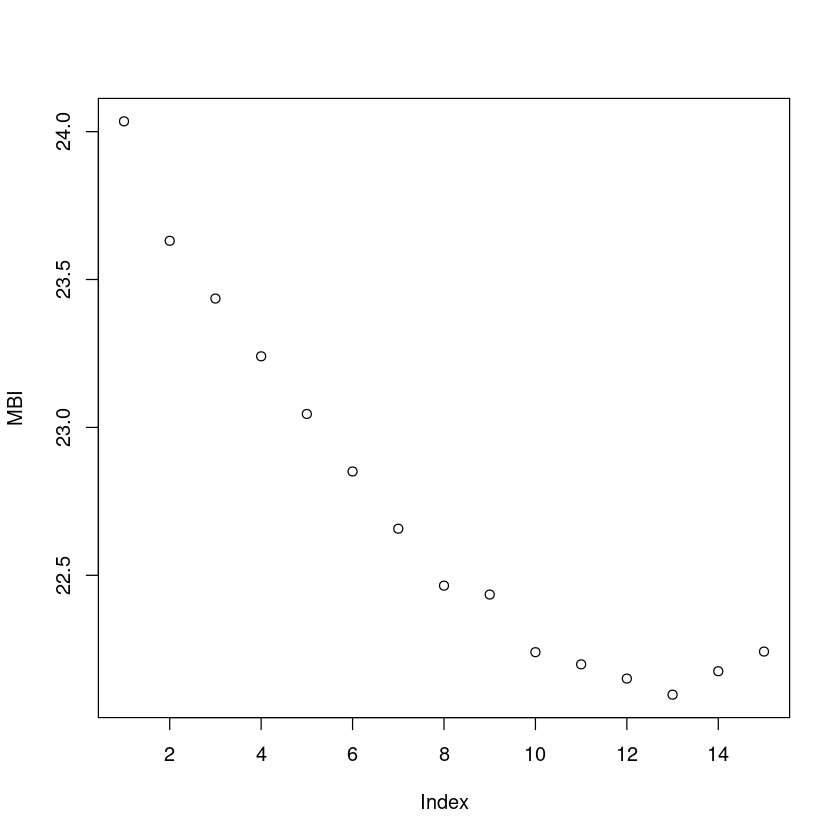

In [42]:
plot(MBI)

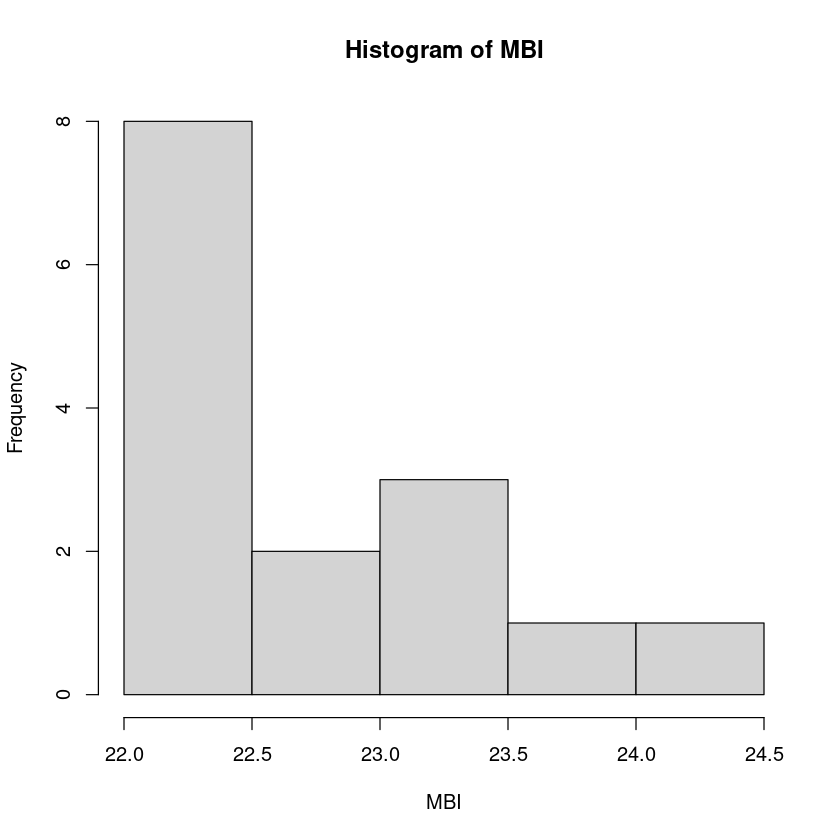

In [43]:
hist(MBI)

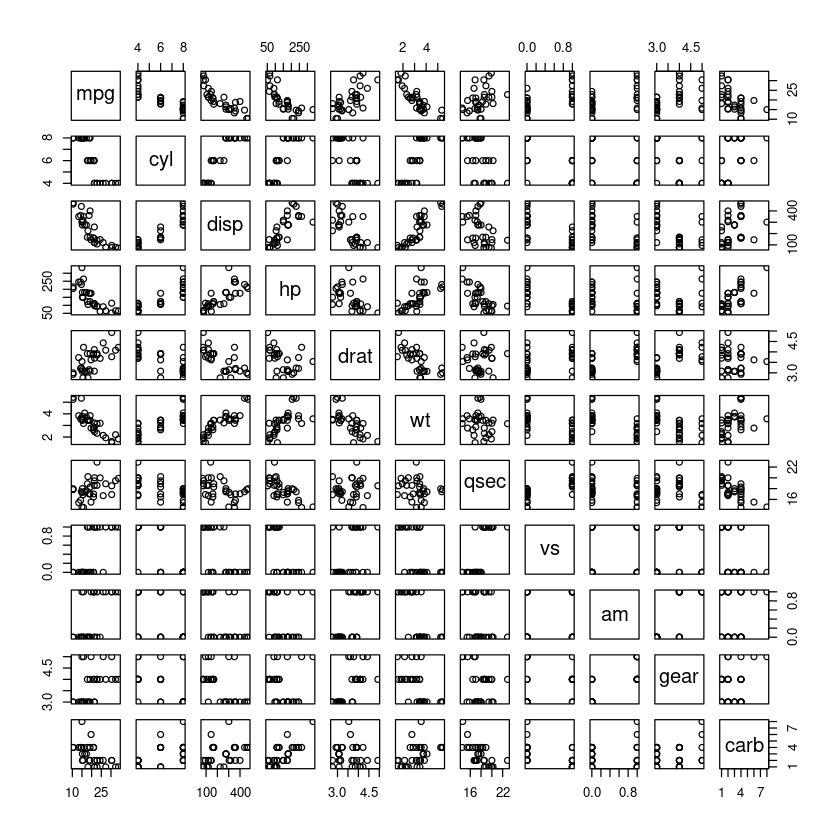

In [44]:
plot(mtcars)

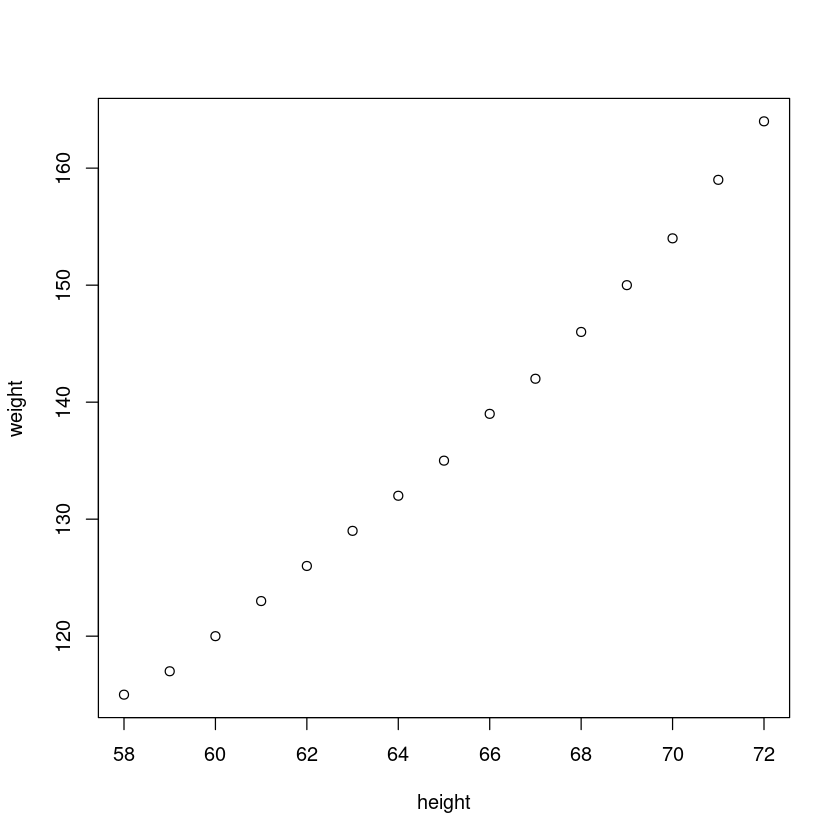

In [45]:
plot(women)

### Creando dataframes

In [53]:
genero <- c("M", "M", "F", "F", "F")
peso <- c(73, 68, 52, 69, 64)

In [54]:
Estudio <- data.frame(Genero = genero, Peso = peso)
Estudio 

Genero,Peso
<chr>,<dbl>
M,73
M,68
F,52
F,69
F,64


In [49]:
?data.frame

### Listas

Los dataframes son un tipo especial de otro tipo de datos llamado **lista**. Las listas son colecciones de otros objetos de R, cualquiera sea su tipo, organizadas de manera que cada elemento de la colección puede ser accedida mediante el nombre de dicha variable:

In [50]:
x <-c(3, 2, 3)
y <-c(7, 7)
z <-list(data1 = x, data2 = y, data3 = women)
z

height,weight
<dbl>,<dbl>
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139


In [56]:
z$data3$height

[1] 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72

Como ven, es posible tener dataframes como elementos de una lista. En general, de hecho, se pueden tener listas de listas. Esto sirve para organizar muchas veces salidas complejas de funciones que calculen muchas cosas, por ejemplo, la regresión lineal:

In [57]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


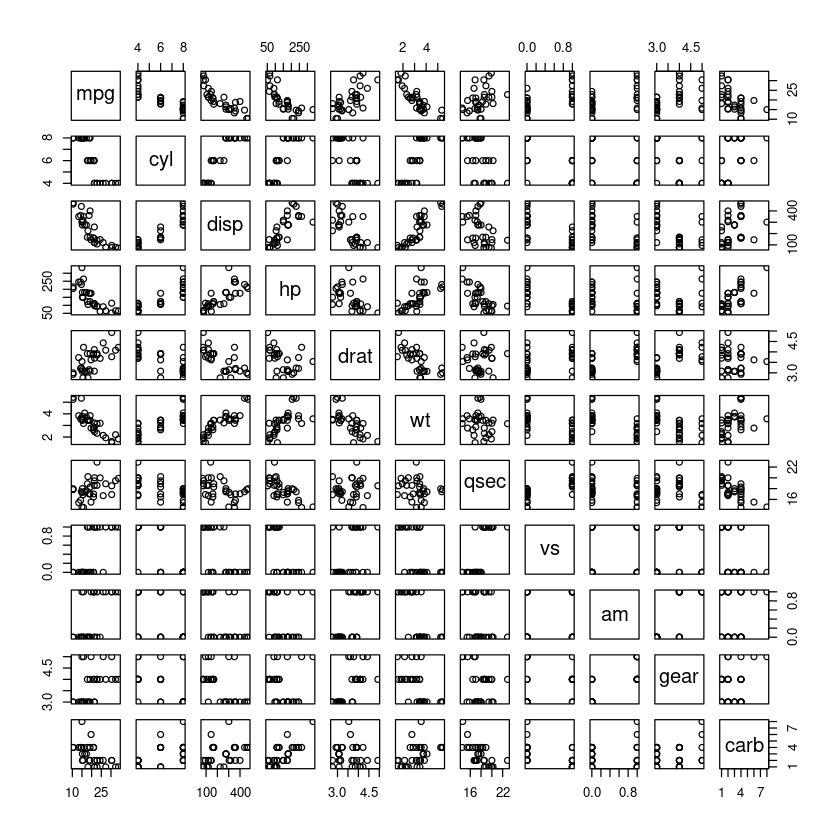

In [58]:
plot(mtcars)

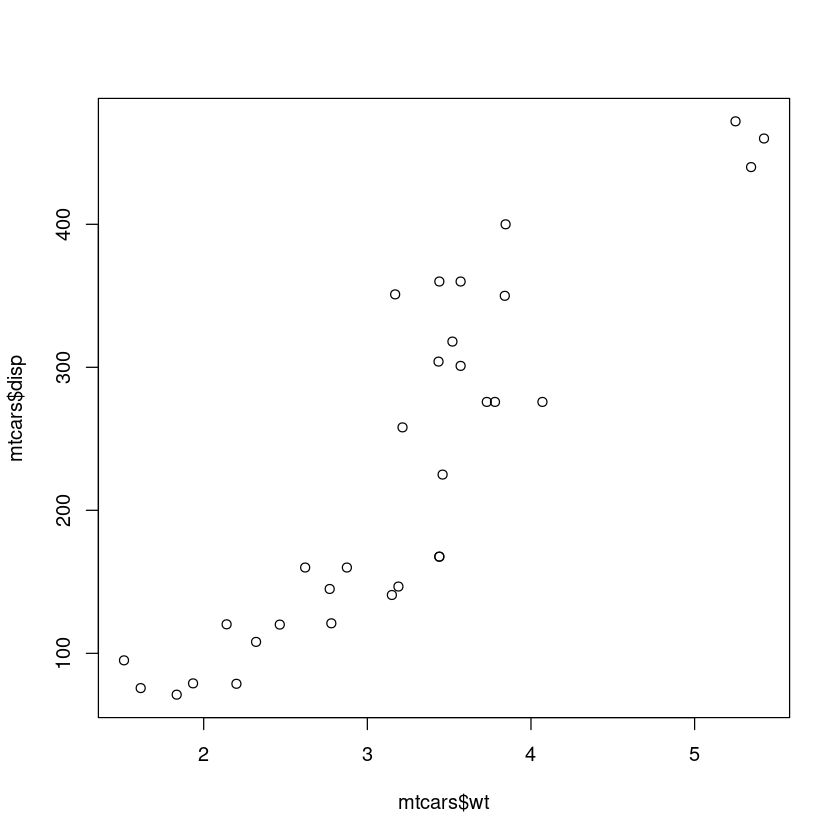

In [59]:
plot(mtcars$wt, mtcars$disp)

In [3]:
#model <- lm(mtcars$disp ~ mtcars$wt + mtcars$hp)
model <- lm(mtcars$disp ~ mtcars$wt)

In [4]:
summary(model)


Call:
lm(formula = mtcars$disp ~ mtcars$wt)

Residuals:
   Min     1Q Median     3Q    Max 
-88.18 -33.62 -10.05  35.15 125.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -131.15      35.72  -3.672 0.000933 ***
mtcars$wt     112.48      10.64  10.576 1.22e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.94 on 30 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7815 
F-statistic: 111.8 on 1 and 30 DF,  p-value: 1.222e-11


In [5]:
str(model)

List of 12
 $ coefficients : Named num [1:2] -131 112
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "mtcars$wt"
 $ residuals    : Named num [1:32] -3.54 -32.23 -21.8 27.53 104.22 ...
  ..- attr(*, "names")= chr [1:32] "1" "2" "3" "4" ...
 $ effects      : Named num [1:32] -1305.2 612.8 -16.8 27.6 103 ...
  ..- attr(*, "names")= chr [1:32] "(Intercept)" "mtcars$wt" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:32] 164 192 130 230 256 ...
  ..- attr(*, "names")= chr [1:32] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:32, 1:2] -5.657 0.177 0.177 0.177 0.177 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:32] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "mtcars$wt"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.05
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 30
 $ xlevels      : Named 

In [6]:
model$coefficients

(Intercept)   mtcars$wt 
  -131.1484    112.4781

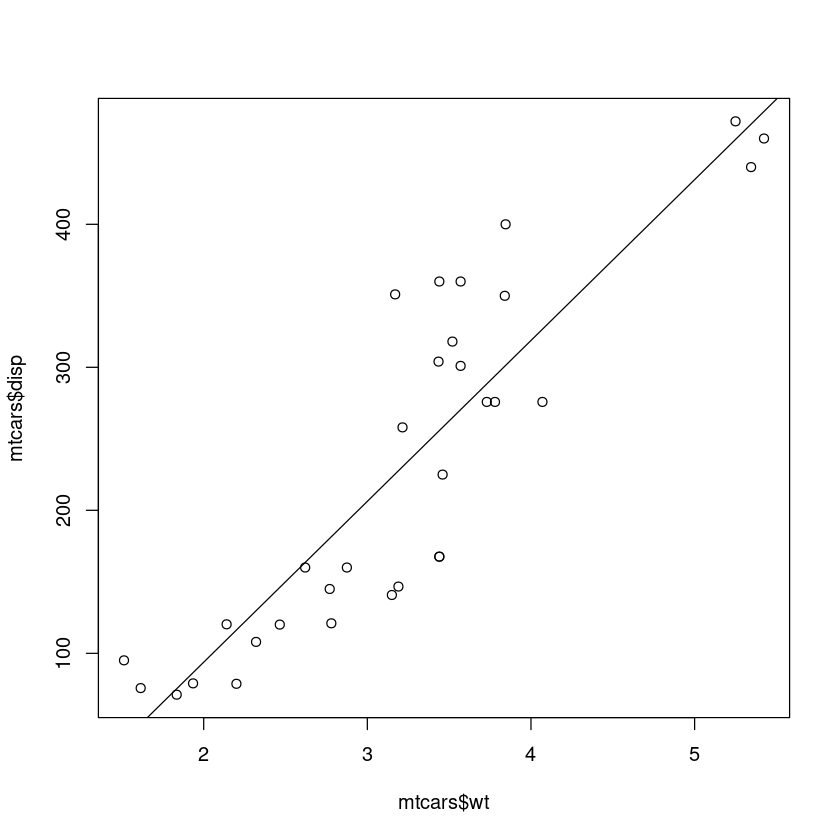

In [7]:
plot(mtcars$wt, mtcars$disp)
abline(model$coefficients)

In [8]:
model$residuals

1          2          3          4          5          6          7 
 -3.544307 -32.226232 -21.800865  27.531201 104.223620 -33.025943  89.601462 
         8          9         10         11         12         13         14 
-80.956846 -82.357720 -88.176380 -88.176380 -50.837608 -12.595040 -18.218947 
        15         16         17         18         19         20         21 
 12.638189 -18.933007 -30.047234 -37.603489  25.196222  -4.148968 -26.010195 
        22         23         24         25         26         27         28 
 53.225369  48.786010  49.232364  98.669974  -7.496782  10.745200  56.068992 
        29         30         31         32 
125.592717 -35.416028  30.601462 -60.540809

Al igual que los dataframes, las listas pueden ser argumentos de la función `summary()`, para obtener información general fácil

In [9]:
summary(model)


Call:
lm(formula = mtcars$disp ~ mtcars$wt)

Residuals:
   Min     1Q Median     3Q    Max 
-88.18 -33.62 -10.05  35.15 125.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -131.15      35.72  -3.672 0.000933 ***
mtcars$wt     112.48      10.64  10.576 1.22e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.94 on 30 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7815 
F-statistic: 111.8 on 1 and 30 DF,  p-value: 1.222e-11


Vemos que tanto el $R^2$ es relativamente bajo como los errores en los estimadores son altos (especialmente el del intercepto). Eso, junto con análisis posibles en los residuales, nos puede dar indicio de que estamos utilizamos un modelo equivocado. Probando ahora sin intercepto:

In [10]:
model2 <- lm(mtcars$disp ~ mtcars$wt - 1)
summary(model2)


Call:
lm(formula = mtcars$disp ~ mtcars$wt - 1)

Residuals:
   Min     1Q Median     3Q    Max 
-95.66 -66.18 -32.22  47.82 113.04 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
mtcars$wt   75.066      3.612   20.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68.62 on 31 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9309 
F-statistic: 431.9 on 1 and 31 DF,  p-value: < 2.2e-16


### Operaciones con listas

In [16]:
x <-c(3, 2, 3)
y <-c(7, 7)
z <-list(data1 = x, data2 = y)
z

$data1
[1] 3 2 3

$data2
[1] 7 7

La función `lapply`, que significa **list apply**, aplica una función específica a cada miembro de una lista, y retorna otra lista con los resultados:

In [17]:
lapply(z, mean)
mode(lapply(z, mean))

$data1
[1] 2.666667

$data2
[1] 7

[1] "list"

En contraste, tenemos la función `vapply`, **vector apply**, que realmente toma también una lista como argumento, y le aplica una función a cada miembro, pero esta vez retornando un vector. El último argumento (en este caso 1) le indica a R qué forma esperar del resultado de la función aplicada, para fines de hacer shaping al resultado.

In [20]:
vapply(z, mean, 1)
mode(vapply(z, mean,1))

data1    data2 
2.666667 7.000000

[1] "numeric"

In [21]:
?vapply